In [2]:
# Importando as bibliotecas que usarei para a carga de dados
import pandas as pd
import sqlite3
import os

In [3]:
# conectando o python com o meu banco de dados que está no pc
conexao = sqlite3.connect('Caminho/do/Seu/computador/database.sqlite')
print('Conexão Bem sucedida')

Conexão Bem sucedida


In [4]:
#  habilitando o cursor, que é basicamente quem vai executar os códigos SQL
cursor = conexao.cursor()

In [5]:
# pegando todas as 'tabelas' presentes no banco de dados por meio do sqlite_master
cursor = conexao.execute('''SELECT name FROM sqlite_master WHERE type ='table';''')

In [6]:
# armazenando na table_list todas as tabelas que o cursor buscou anteriormente
table_list = cursor.fetchall()
print(table_list)

[('sqlite_sequence',), ('Player_Attributes',), ('Player',), ('Match',), ('League',), ('Country',), ('Team',), ('Team_Attributes',)]


In [7]:
# função resposável por transformar o arquivo (tabelas) em csv e posteriormente salvá-las
def save(tabelas):
    command = 'SELECT * FROM '+ tabelas
    df_tabelas = pd.read_sql(command, conexao)
    modelpath = 'Caminho/do/Seu/computador/'
    df_tabelas.to_csv(modelpath + tabelas + '.csv', index = False)

In [8]:
# salvando cada tabela por meio da função 'save'
for tabela in table_list:
    print(f"Salvando tabela: {tabela[0]}")
    save(tabela[0])

Salvando tabela: sqlite_sequence
Salvando tabela: Player_Attributes
Salvando tabela: Player
Salvando tabela: Match
Salvando tabela: League
Salvando tabela: Country
Salvando tabela: Team
Salvando tabela: Team_Attributes


In [9]:
# salvando as tabelas já separadas em data frames pandas 
caminho = 'Caminho/do/Seu/computador/'
df_Country = pd.read_csv(caminho + 'Country.csv')
df_League = pd.read_csv(caminho + 'League.csv')
df_Match = pd.read_csv(caminho + 'Match.csv')
df_Player = pd.read_csv(caminho + 'Player.csv')
df_Player_Attributes = pd.read_csv(caminho + 'Player_Attributes.csv')
df_Team = pd.read_csv(caminho + 'Team.csv')
df_Team_Attributes = pd.read_csv(caminho + 'Team_Attributes.csv')
df_sequence = pd.read_csv(caminho + 'sqlite_sequence.csv')

In [34]:
print(df_Team_Attributes.head())

   id  team_fifa_api_id  team_api_id                 date  buildUpPlaySpeed  \
0   1               434         9930  2010-02-22 00:00:00                60   
1   2               434         9930  2014-09-19 00:00:00                52   
2   3               434         9930  2015-09-10 00:00:00                47   
3   4                77         8485  2010-02-22 00:00:00                70   
4   5                77         8485  2011-02-22 00:00:00                47   

  buildUpPlaySpeedClass  buildUpPlayDribbling buildUpPlayDribblingClass  \
0              Balanced                   NaN                    Little   
1              Balanced                  48.0                    Normal   
2              Balanced                  41.0                    Normal   
3                  Fast                   NaN                    Little   
4              Balanced                   NaN                    Little   

   buildUpPlayPassing buildUpPlayPassingClass  ... chanceCreationShooting 

In [35]:
print(df_Team_Attributes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [36]:
print(df_Team_Attributes.describe())

                id  team_fifa_api_id    team_api_id  buildUpPlaySpeed  \
count  1458.000000       1458.000000    1458.000000       1458.000000   
mean    729.500000      17706.982167    9995.727023         52.462277   
std     421.032659      39179.857739   13264.869900         11.545869   
min       1.000000          1.000000    1601.000000         20.000000   
25%     365.250000        110.000000    8457.750000         45.000000   
50%     729.500000        485.000000    8674.000000         52.000000   
75%    1093.750000       1900.000000    9904.000000         62.000000   
max    1458.000000     112513.000000  274581.000000         80.000000   

       buildUpPlayDribbling  buildUpPlayPassing  chanceCreationPassing  \
count            489.000000         1458.000000            1458.000000   
mean              48.607362           48.490398              52.165295   
std                9.678290           10.896101              10.360793   
min               24.000000           20.00000

In [33]:
display(df_Team_Attributes)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,...,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


In [38]:
# Exemplo de contagem de valores únicos
print(df_Team_Attributes['chanceCreationShooting'].unique())

[55 64 70 52 57 63 50 75 69 60 65 66 44 38 67 46 39 30 40 47 48 35 43 42
 56 34 51 59 37 36 79 54 49 72 53 68 61 22 41 58 45 76 73 62 80 78 33 32
 71 28 31 23 77 24 27 74 29]


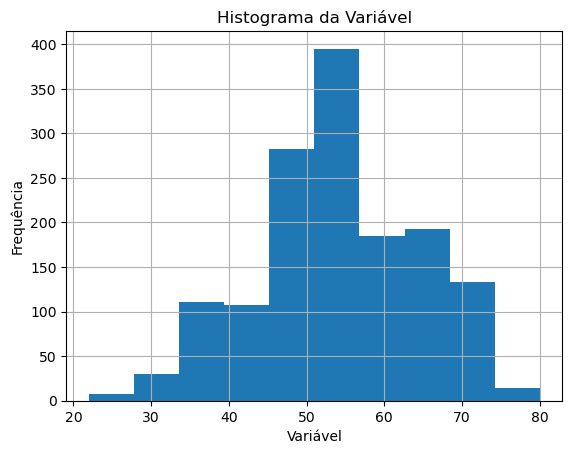

In [40]:
# Exemplo de histograma
import matplotlib.pyplot as plt
df_Team_Attributes['chanceCreationShooting'].hist()
plt.xlabel('Variável')
plt.ylabel('Frequência')
plt.title('Histograma da Variável')
plt.show()
